<a href="https://colab.research.google.com/github/sapkale12345/Healthcare-Insurance-Cost-Prediction/blob/main/Healthcare_Insurance_Cost_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
#Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
#Metrics
from sklearn.metrics import mean_squared_error,r2_score



In [ ]:

df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,Male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [ ]:
# Remove Unwanted Observation
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

In [ ]:
# Handle Categorical feature
df.sex.value_counts()
df.sex=df.sex.map({"male":"male",
            "female":"female",
            "Male":"male",
            "M":"male",
            "F":"female"})
df.sex.value_counts()


,count
sex,
male,675
female,662


In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
#Missing Values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#Irrelevant feature
df.drop(columns=["children"],inplace=True)


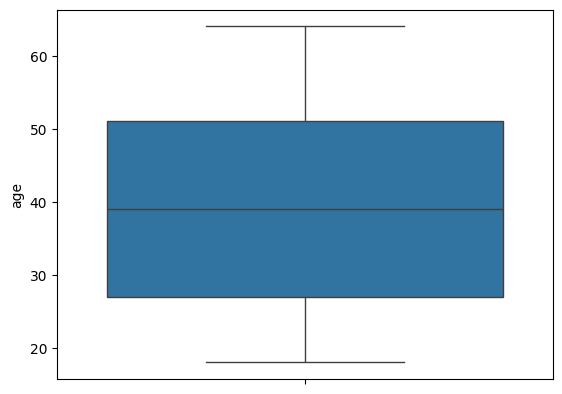

In [ ]:
#Detection of outliers with Box plot
sns.boxplot(df['age'])
plt.show()

<Axes: ylabel='bmi'>

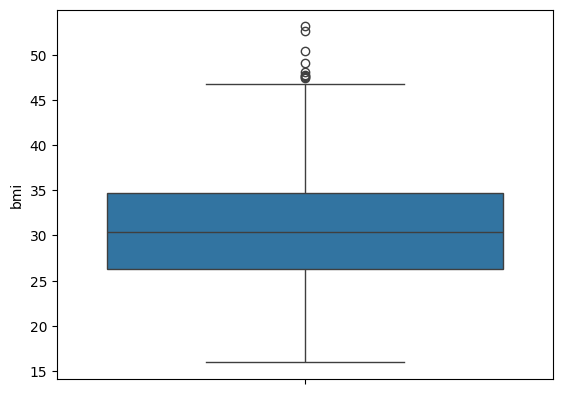

In [ ]:
sns.boxplot(df['bmi'])

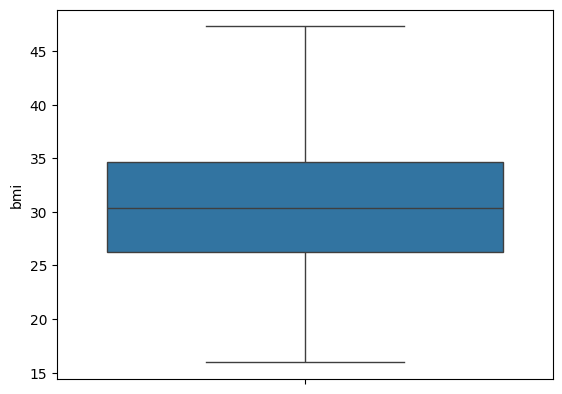

In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
df["bmi"]=np.clip(df.bmi,a_min=lowlim,a_max=upplim)
sns.boxplot(df.bmi)
plt.show()


# Exploratory Data Analysis

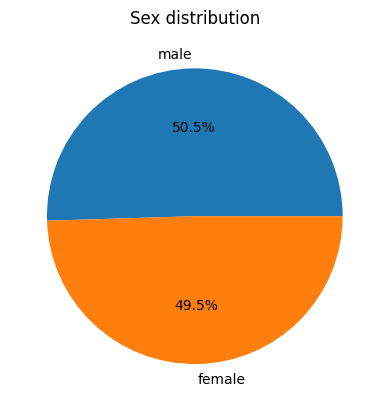

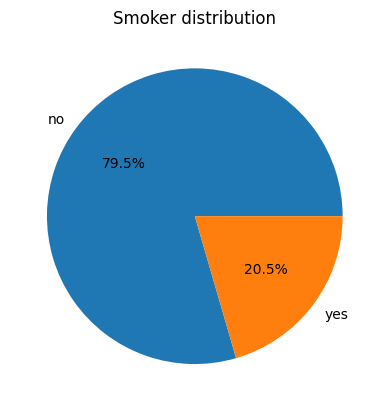

In [ ]:
#Distribution of features using pia chart
plt.pie(df.sex.value_counts(),labels=df.sex.value_counts().index,autopct="%1.1f%%")
plt.title("Sex distribution")
plt.show()
plt.pie(df.smoker.value_counts(),labels=df.smoker.value_counts().index,autopct="%1.1f%%")
plt.title("Smoker distribution")
plt.show()


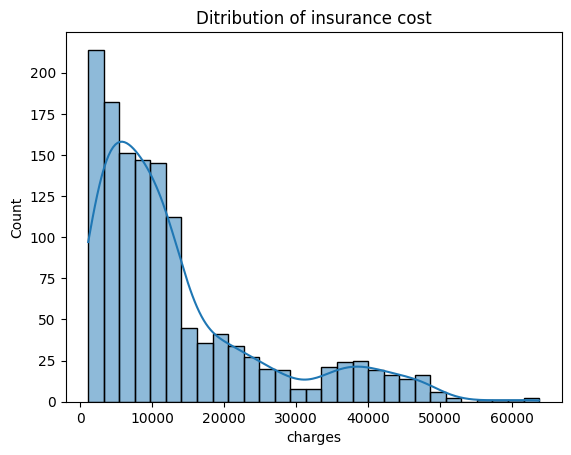

In [ ]:
#Charges Distribution
plt.figure()
sns.histplot(df["charges"],kde=True)
plt.title("Ditribution of insurance cost")
plt.show()


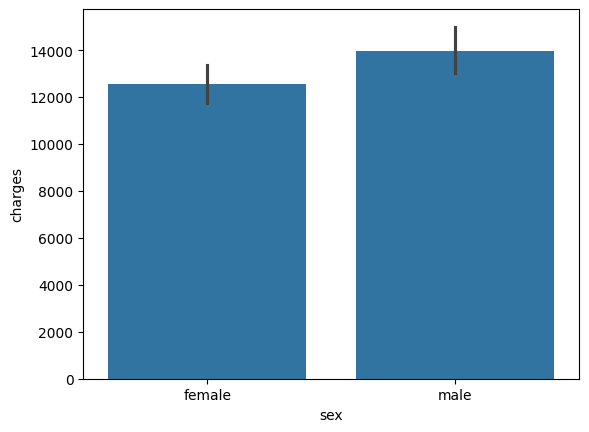

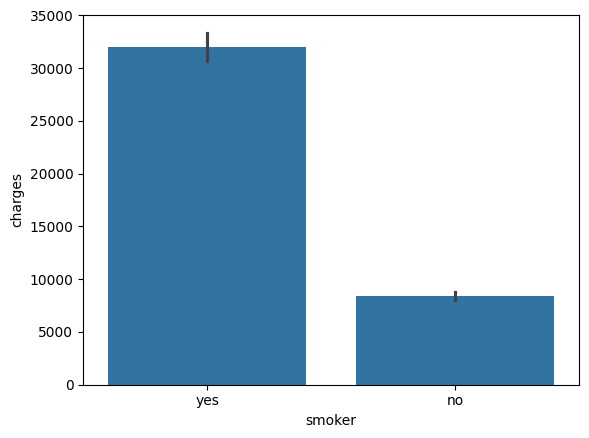

In [ ]:

sns.barplot(data=df,x="sex",y="charges")
plt.show()
sns.barplot(data=df,x="smoker",y="charges")
plt.show()



# Correlation Analysis

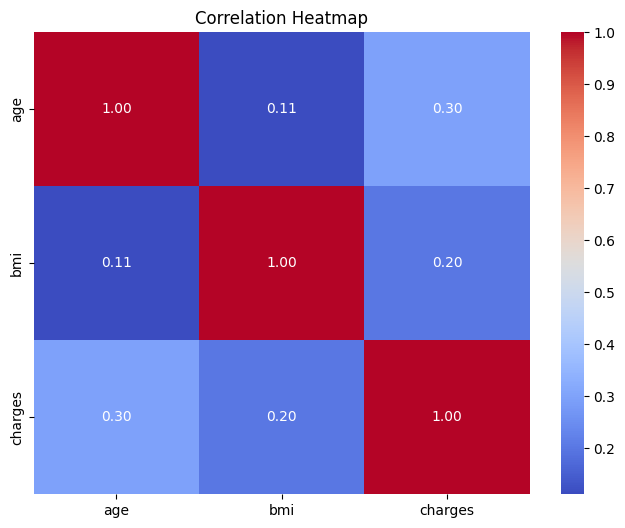

In [ ]:
num_df = df.select_dtypes(include=np.number)
corr_matrix = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Model Development

In [ ]:
X=df.drop(columns=["charges"])
Y=(df.charges)



In [ ]:
Numerical_features=["age","bmi"]
Categorical_Nominal_features=["sex","smoker"]
Numerical_transformer=StandardScaler()
Categorical_Nominal_transformer=OneHotEncoder(drop="first")

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ("num",Numerical_transformer,Numerical_features),
    ("cat",Categorical_Nominal_transformer,Categorical_Nominal_features),

])

In [ ]:
#Train Test split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)


# Linear Regression

In [ ]:
lrmodel=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LinearRegression())
])
lrmodel.fit(xtrain,ytrain)
ypredtrain=lrmodel.predict(xtrain)
ypredtest=lrmodel.predict(xtest)
print("Training R2",r2_score(ytrain,ypredtrain))
print("Testin R2",r2_score(ytest,ypredtest))
print("CV",cross_val_score(lrmodel,X,Y,cv=5,).mean())
print("MSE",np.sqrt(mean_squared_error(ytest,ypredtest)))

Training R2 0.7263229151086175
Testin R2 0.8050840113667092
CV 0.7450083893856363
MSE 5984.730143451181


# Assumptions of Linear Regression

Linearity

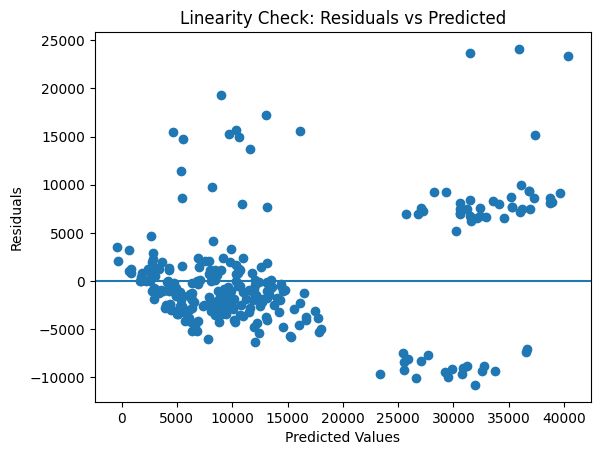

In [ ]:
residuals = ytest - ypredtest

plt.figure()
plt.scatter(ypredtest, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Predicted")
plt.show()


Relationship between predictors and target is  not linear.

Independence of Errors

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
dw_stat


np.float64(2.072566742000167)

Residuals are independent (no autocorrelation)

Normality of Errors

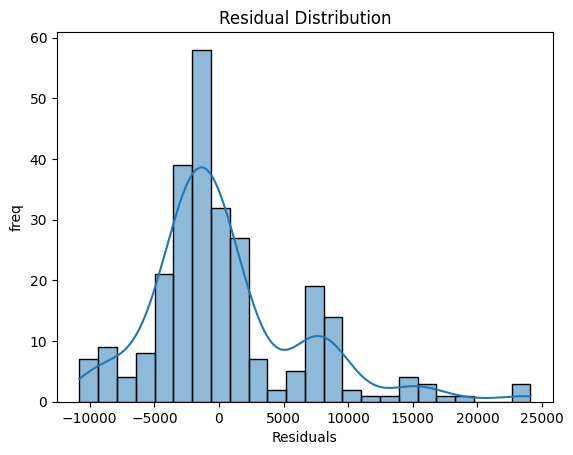

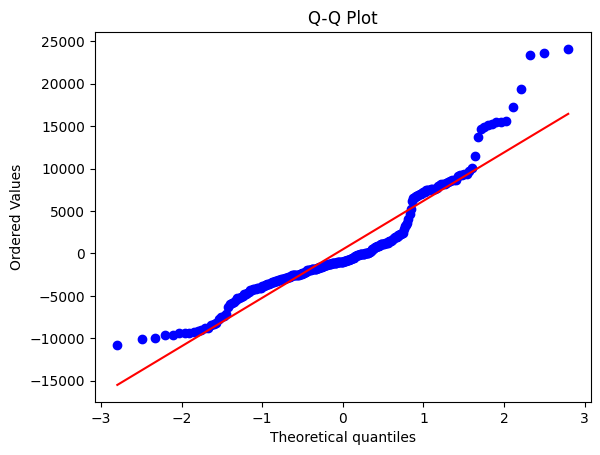

In [ ]:

# Histogram
plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("freq")
plt.show()

# Q-Q Plot
import scipy.stats as stats
plt.figure()
stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot")
plt.show()


Residuals are not normaliy Distributed

# Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
RFmodel=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor(random_state=42,n_estimators=40,max_depth=5))
])
param_grid={"model__n_estimators":[10,40,50,80,90,120],
            "model__max_depth":[None,5,8,12],
            }
grid=GridSearchCV(estimator=RFmodel,param_grid=param_grid,cv=5,scoring="r2")
grid.fit(xtrain,ytrain)
print(grid.best_params_)
RFmodel.fit(xtrain,ytrain)
y_pred_train=RFmodel.predict(xtrain)
y_pred_test=RFmodel.predict(xtest)
print("Training R2",r2_score(ytrain,y_pred_train))
print("Testing R2",r2_score(ytest,y_pred_test))
print("CV",cross_val_score(RFmodel,X,Y,cv=10).mean())
print("MSE",np.sqrt(mean_squared_error(ytest,y_pred_test)))



{'model__max_depth': 5, 'model__n_estimators': 40}
Training R2 0.8714260572251484
Testing R2 0.8997855486718904
CV 0.850915501666645
MSE 4291.271738784639


# Gradient Boosting Regressor

In [ ]:
GBRmodel=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",GradientBoostingRegressor(random_state=42,learning_rate=0.2,n_estimators=19))
])
estimator=GBRmodel
param_grid={'model__n_estimators':[10,15,19,20,21,50],'model__learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
GBRmodel.fit(xtrain,ytrain)
ypredtrain=GBRmodel.predict(xtrain)
ypredtest=GBRmodel.predict(xtest)
print("Traning R2",r2_score(ytrain,ypredtrain))
print("Testing R2",r2_score(ytest,ypredtest))
print("CV",cross_val_score(GBRmodel,X,Y,cv=5,).mean())
print("MSE",np.sqrt(mean_squared_error(ytest,ypredtest)))
# Adjusted R-squared
n = xtest.shape[0]   # number of observations
p = xtest.shape[1]   # number of features
r2 = r2_score(ytest, ypredtest)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adj_r2)



{'model__learning_rate': 0.2, 'model__n_estimators': 19}
Traning R2 0.8611359523081001
Testing R2 0.9003991862152814
CV 0.8561600957282403
MSE 4278.113312708113
Adjusted R2 Score: 0.8984984073262601


In [ ]:
features_names=GBRmodel.named_steps["preprocessor"].get_feature_names_out()
features_importances=GBRmodel.named_steps["model"].feature_importances_
important_features=pd.DataFrame({"feature":features_names,
                                 "importance":features_importances})
important_features





,feature,importance
0,num__age,0.123368
1,num__bmi,0.180179
2,cat__sex_male,0.000628
3,cat__smoker_yes,0.695825


# Final Model

In [ ]:
X=df.drop(columns=["charges","sex"])
Y=df.charges

In [ ]:
Numerical_features=["age","bmi"]
Categorical_Nominal_features=["smoker"]
Numerical_transformer=StandardScaler()
Categorical_Nominal_transformer=OneHotEncoder(drop="first")

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ("numerical",Numerical_transformer,Numerical_features),
    ("categorical",Categorical_Nominal_transformer,Categorical_Nominal_features),

])

In [ ]:
#Train Test split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
Best_GBRmodel=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",GradientBoostingRegressor(random_state=42,learning_rate=0.2,n_estimators=19))
])
Best_GBRmodel.fit(xtrain,ytrain)
ypredtrain=Best_GBRmodel.predict(xtrain)
ypredtest=Best_GBRmodel.predict(xtest)
print("Traning R2",r2_score(ytrain,ypredtrain))
print("Testing R2",r2_score(ytest,ypredtest))
print("CV",cross_val_score(Best_GBRmodel,X,Y,cv=5,).mean())
print("MSE",np.sqrt(mean_squared_error(ytest,ypredtest)))
# Adjusted R-squared
n = xtest.shape[0]   # number of observations
p = xtest.shape[1]   # number of features
r2 = r2_score(ytest, ypredtest)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adj_r2)



Traning R2 0.8615027152002236
Testing R2 0.9012302674415524
CV 0.8564043673267785
MSE 4260.227376717391
Adjusted R2 Score: 0.8997280661859106


In [ ]:
#smoker(yes,no)
def pridict(age,bmi,smoker):
    prediction=Best_GBRmodel.predict(pd.DataFrame({"age":age,
                                    "bmi":bmi,
                                    "smoker":smoker,
                                    },index=[0]))

    return prediction


In [ ]:
pridict(23,19.5,"no")

array([5204.13120709])

# Model Peformance

In [ ]:
def BMI(bmi):
    if bmi<=18.5:
        Risk="UnderWeight"
    elif bmi<=25:
        Risk="Normal"
    else:
        Risk="OverWeight"
    return Risk

In [ ]:
def Age(age):
    if age<=30:
        Risk="Young"
    elif age<=55:
        Risk="Adult"
    else:
        Risk="Senior"
    return Risk


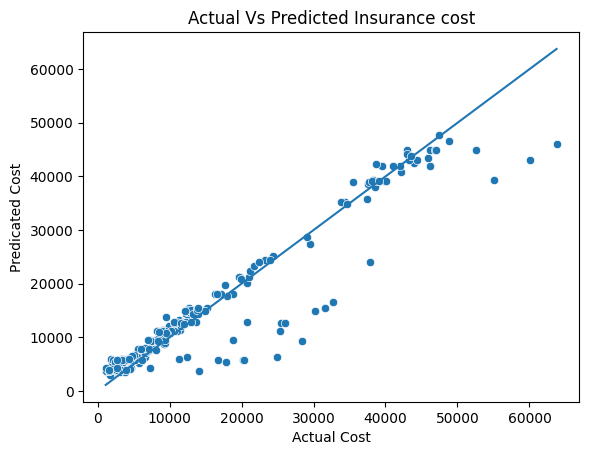

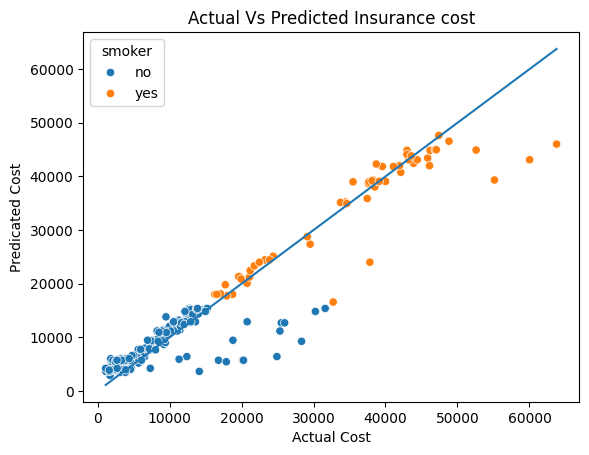

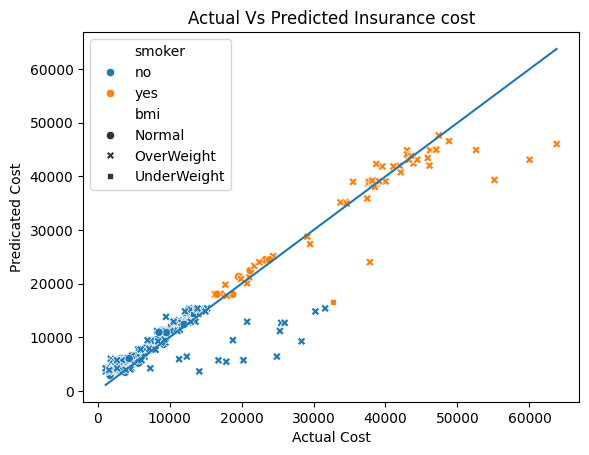

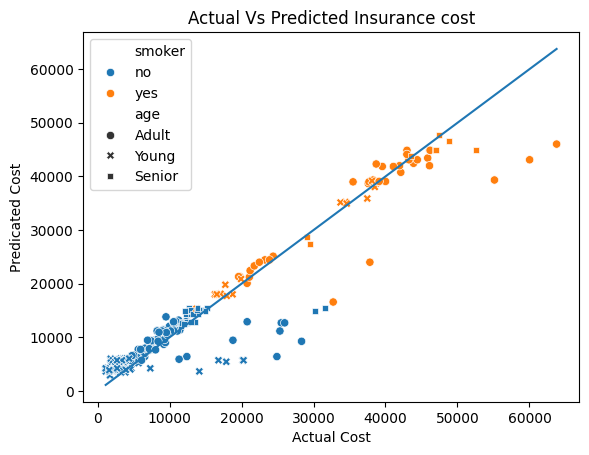

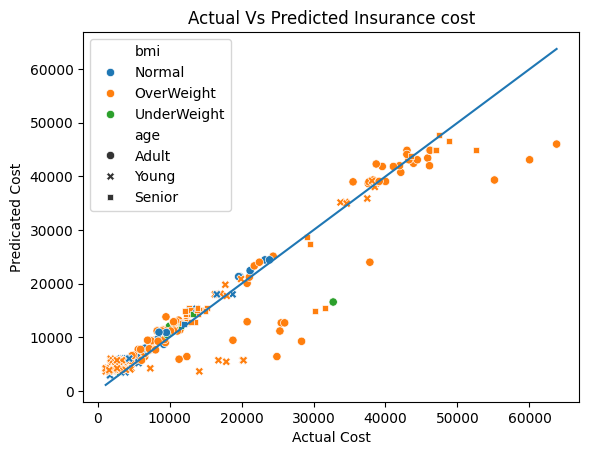

In [ ]:
sns.scatterplot(x=ytest,y=ypredtest)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()])
plt.xlabel("Actual Cost")
plt.ylabel("Predicated Cost")
plt.title("Actual Vs Predicted Insurance cost")
plt.show()
sns.scatterplot(x=ytest,y=ypredtest,hue=xtest.smoker)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()])
plt.xlabel("Actual Cost")
plt.ylabel("Predicated Cost")
plt.title("Actual Vs Predicted Insurance cost")
plt.show()
sns.scatterplot(x=ytest,y=ypredtest,hue=xtest.smoker,style=xtest.bmi.apply(BMI))
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()])
plt.xlabel("Actual Cost")
plt.ylabel("Predicated Cost")
plt.title("Actual Vs Predicted Insurance cost")
plt.show()
sns.scatterplot(x=ytest,y=ypredtest,style=xtest.age.apply(Age),hue=xtest.smoker)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()])
plt.xlabel("Actual Cost")
plt.ylabel("Predicated Cost")
plt.title("Actual Vs Predicted Insurance cost")
plt.show()
sns.scatterplot(x=ytest,y=ypredtest,style=xtest.age.apply(Age),hue=xtest.bmi.apply(BMI))
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()])
plt.xlabel("Actual Cost")
plt.ylabel("Predicated Cost")
plt.title("Actual Vs Predicted Insurance cost")
plt.show()
